In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
powerlaw = lambda E, N, a: N*(E/100)**a

E = np.geomspace(1, 1000, 10)

In [3]:
def gauss(E, N, E0, std):
    return np.exp(-1./2*(E-E0)**2/std**2)*N

In [55]:
def likelihood(signu, g_arr, b_obs, on_obs, alpha):
    g = sum(g_arr)*10**signu
    g_arr = g_arr*10**signu

    d = np.sqrt(((1+1./alpha)*g_arr-on_obs-b_obs)**2.+4*(1+1./alpha)*b_obs*g_arr)
    b_arr = (on_obs+b_obs-(1+1./alpha)*g_arr+d)/(2*(1+alpha))
    b = sum(b_arr)
#     b = sum(on_obs+b_obs)/(1+alpha)
#     b_arr = b_obs/sum(b_obs)*b

    b_obs = b_obs

    g_arr = g_arr
    b_arr = b_arr
    b_obs = b_obs
    on_obs = on_obs

    logl = -g - (1+alpha)*b+sum(on_obs*np.log(g_arr+alpha*b_arr)+b_obs*np.log(b_arr))

    return -logl


def nullLikelihood(g_arr, b_obs, on_obs, alpha):
    g = 0
    g_arr = np.zeros(len(g_arr))

    b = sum(on_obs+b_obs)/(1+alpha)
    b_arr = b_obs/sum(b_obs)*b

    b_obs = b_obs

    valid = (b_arr !=0)


    g_arr = g_arr
    b_arr = b_arr
    b_obs = b_obs
    on_obs = on_obs

    logl = - (1+alpha)*b+sum(on_obs*np.log(alpha*b_arr)+b_obs*np.log(b_arr))

    return -logl


In [64]:
ul = []
exp = np.geomspace(1, 100000, 100)
tt = []

for exposure in exp:
    alpha=0.1

    bkgModel = powerlaw(E, 0.001, -2)
    observation = powerlaw(E, 0.001, -2)
#    sourceModel = powerlaw(E, 0.000001, -1.5)
    sourceModel = gauss(E, 0.0001, 100, 20)
    
    tb = exposure/alpha
    ts = exposure

    n = nullLikelihood(sourceModel*ts, bkgModel*tb, observation*ts, alpha)


    def profL(N):
        return [-n+likelihood3(n, sourceModel*ts, bkgModel*tb, observation*ts, alpha) for n in N]

    def deltaL(N):
        return -n+likelihood3(N, sourceModel*ts, bkgModel*tb, observation*ts, alpha)

    def fcn(N):
        return deltaL(N)-1.35
        
        
    N_solution = fsolve(fcn, 100)[0]
    ul.append(10**N_solution)
    tt.append(1+sourceModel*ts*10**N_solution/(ts*bkgModel))

ul=np.asarray(ul)
tt = np.asarray(tt)

In [62]:
ul2 = []
exp = np.geomspace(1, 100000, 100)
tt = []

for exposure in exp:
    alpha=0.1

    bkgModel = powerlaw(E, 0.001, -2)
    observation = powerlaw(E, 0.001, -2)
    sourceModel2 = powerlaw(E, 0.000001, -1.5)
    sourceModel = powerlaw(E, 0.000001, -1.5)
#    sourceModel = gauss(E, 0.0001, 100, 20)
    
    tb = exposure/alpha
    ts = exposure

    n = nullLikelihood(sourceModel*ts, bkgModel*tb, observation*ts, alpha)


    def profL(N):
        return [-n+likelihood3(n, sourceModel*ts, bkgModel*tb, observation*ts, alpha) for n in N]

    def deltaL(N):
        return -n+likelihood3(N, sourceModel*ts, bkgModel*tb, observation*ts, alpha)

    def fcn(N):
        return deltaL(N)-1.35
        
        
    N_solution = fsolve(fcn, 100)[0]
    ul2.append(10**N_solution)
    tt.append(1+sourceModel*ts*10**N_solution/(ts*bkgModel))

ul2=np.asarray(ul2)
tt = np.asarray(tt)

Text(0, 0.5, 'Counts')

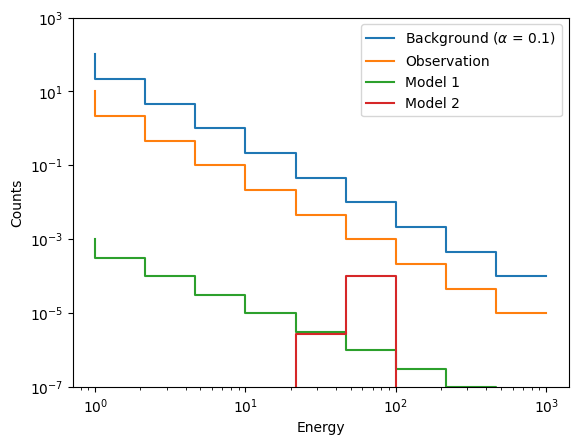

In [70]:
plt.step(E, bkgModel/alpha, label=r"Background ($\alpha$ = 0.1)")
plt.step(E, observation, label="Observation")
plt.step(E, sourceModel2, label="Model 1")
plt.step(E, sourceModel, label="Model 2")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.ylim(1e-7, 1e3)
plt.xlabel("Energy")
plt.ylabel("Counts")

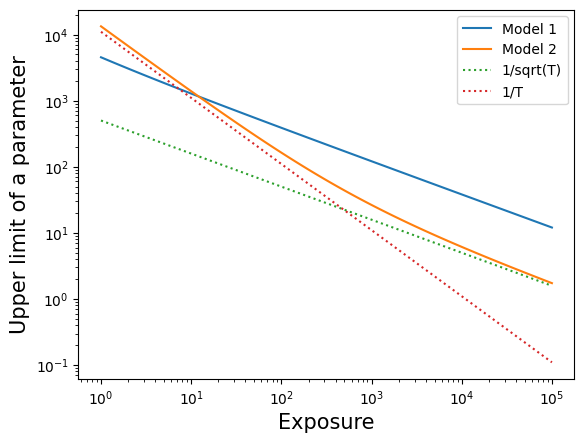

In [67]:
plt.plot(exp, ul2, label="Model 1")
plt.plot(exp, ul, label="Model 2")
plt.xscale("log")
plt.yscale("log")
plt.plot(exp, 500/np.sqrt(exp), label="1/sqrt(T)", ls=":")
plt.plot(exp, 11000/exp, label="1/T", ls=":")
plt.xlabel("Exposure", fontsize=15)
plt.ylabel("Upper limit of a parameter", fontsize=15)
plt.legend()